In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Layout Plotting

In [9]:
import os
import numpy as np

from impact import Impact

from impact.parsers import parse_impact_input
from impact.plotting import layout_plot
from impact.fieldmaps import ele_field, lattice_field

from bokeh.plotting import output_notebook
from bokeh.plotting import show
output_notebook(hide_banner=True)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [10]:
infile = 'templates/lcls_injector/ImpactT.in'

## matplotlib plotting from the Impact object

-71.43123025418063 71.44027918658537


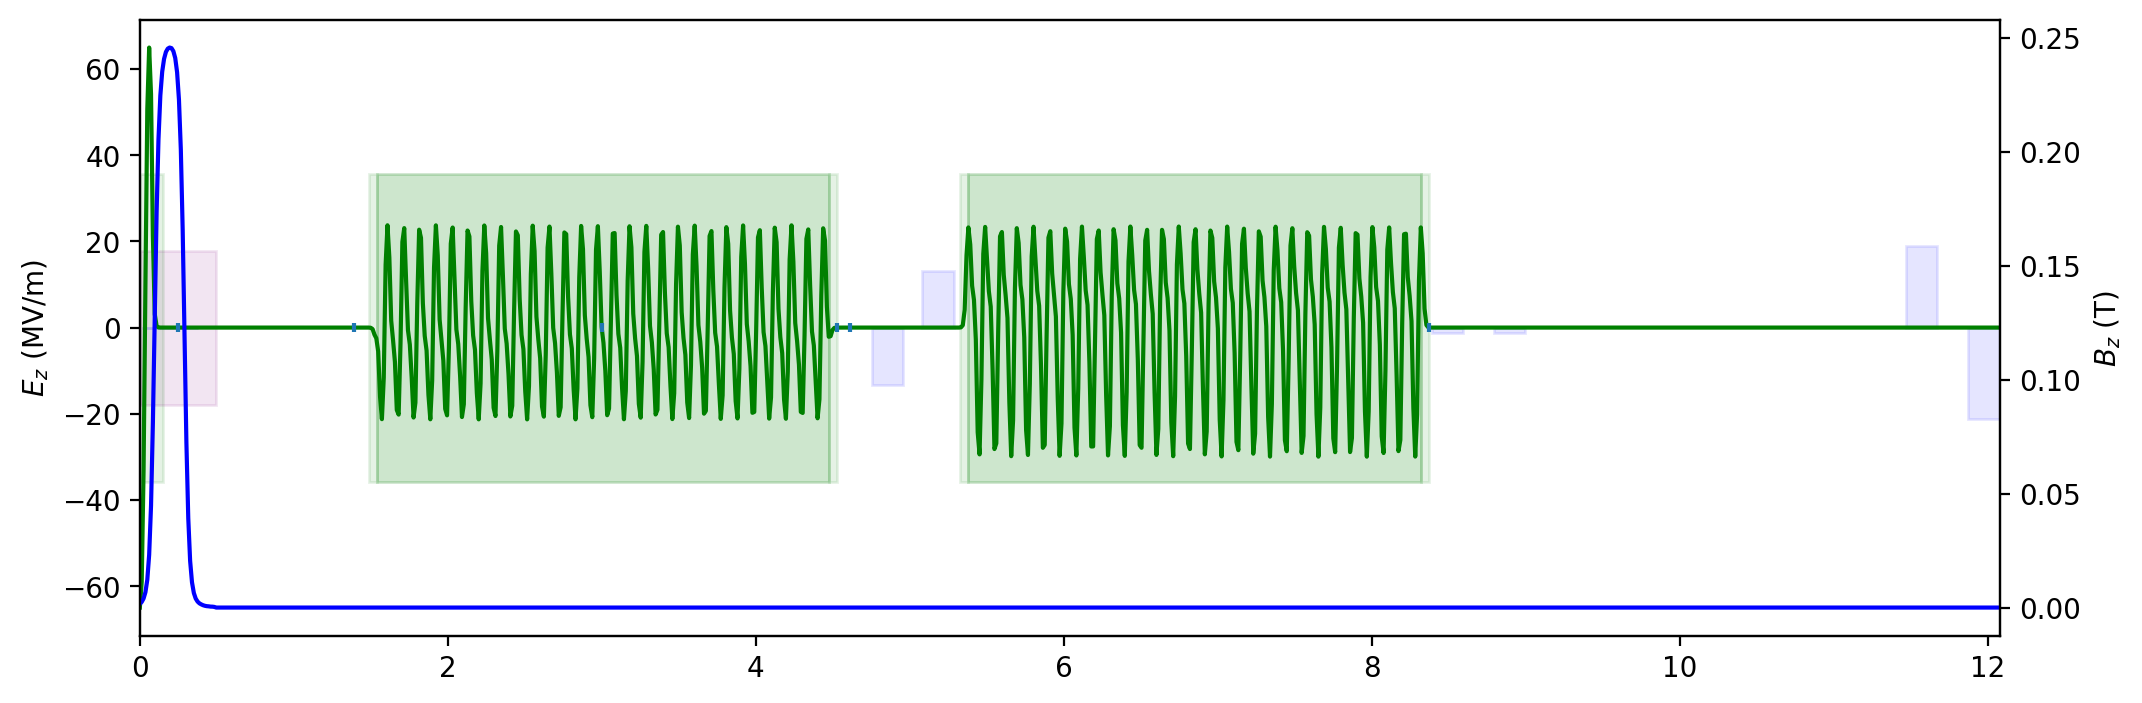

In [22]:
I = Impact(infile)
I.plot(figsize=(12,4))

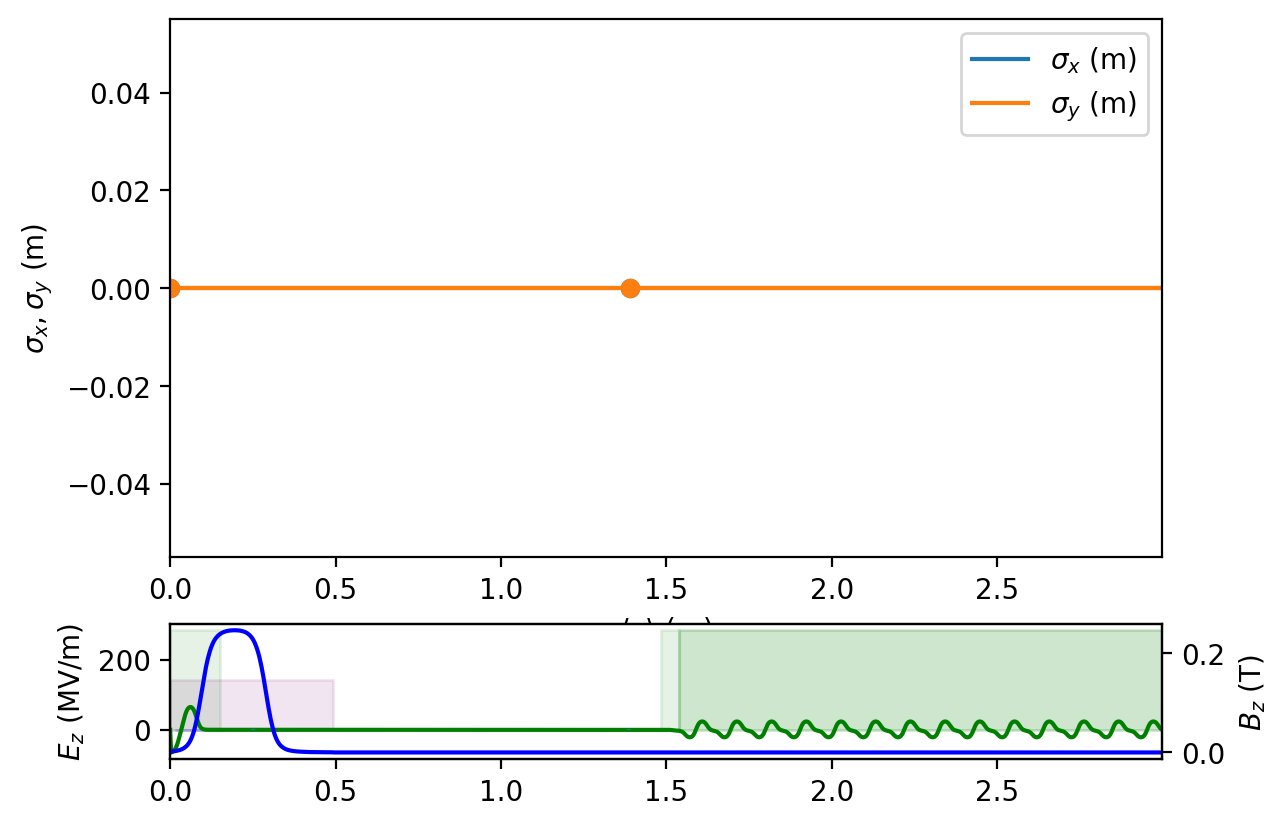

In [12]:
I.track1()
I.plot()

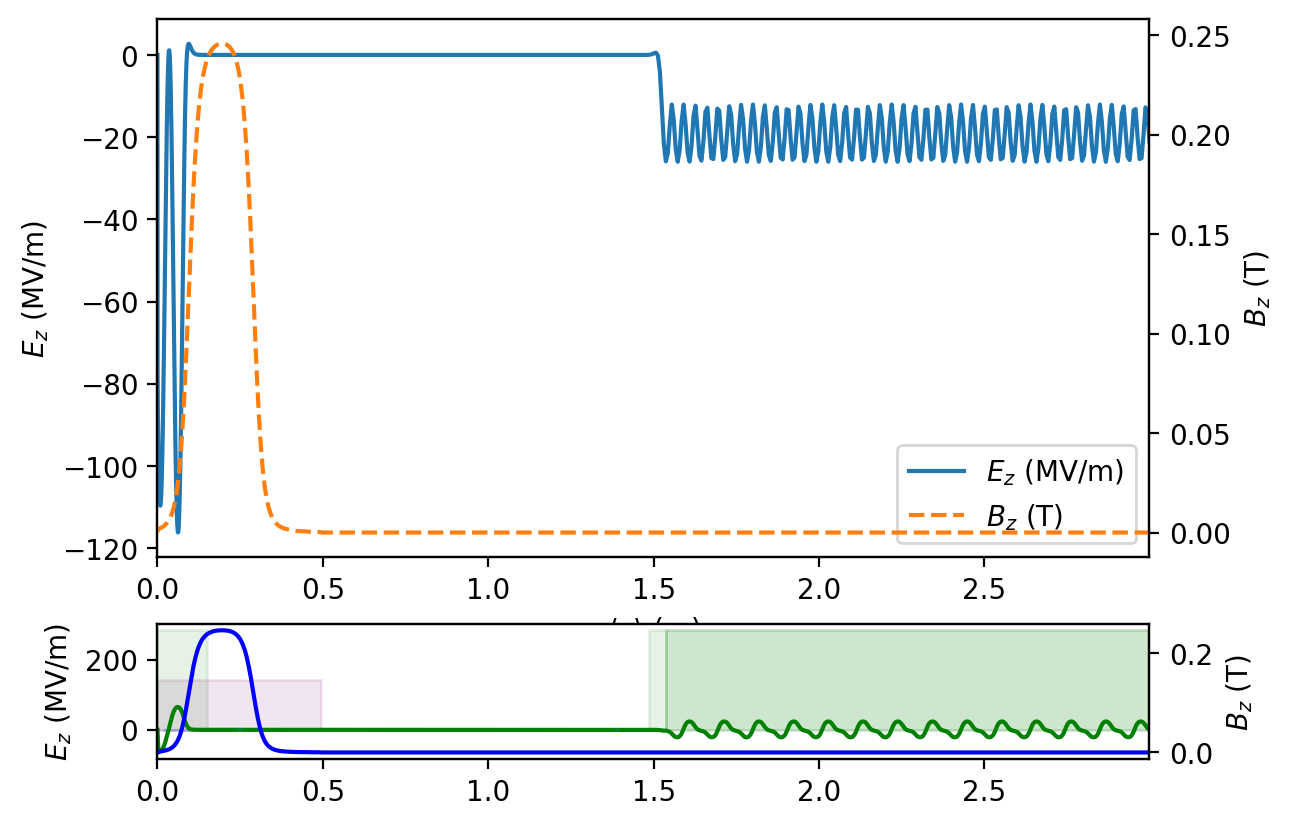

In [18]:
# These are the fields seen by the bunch centroid
I.plot('Ez', y2='Bz')

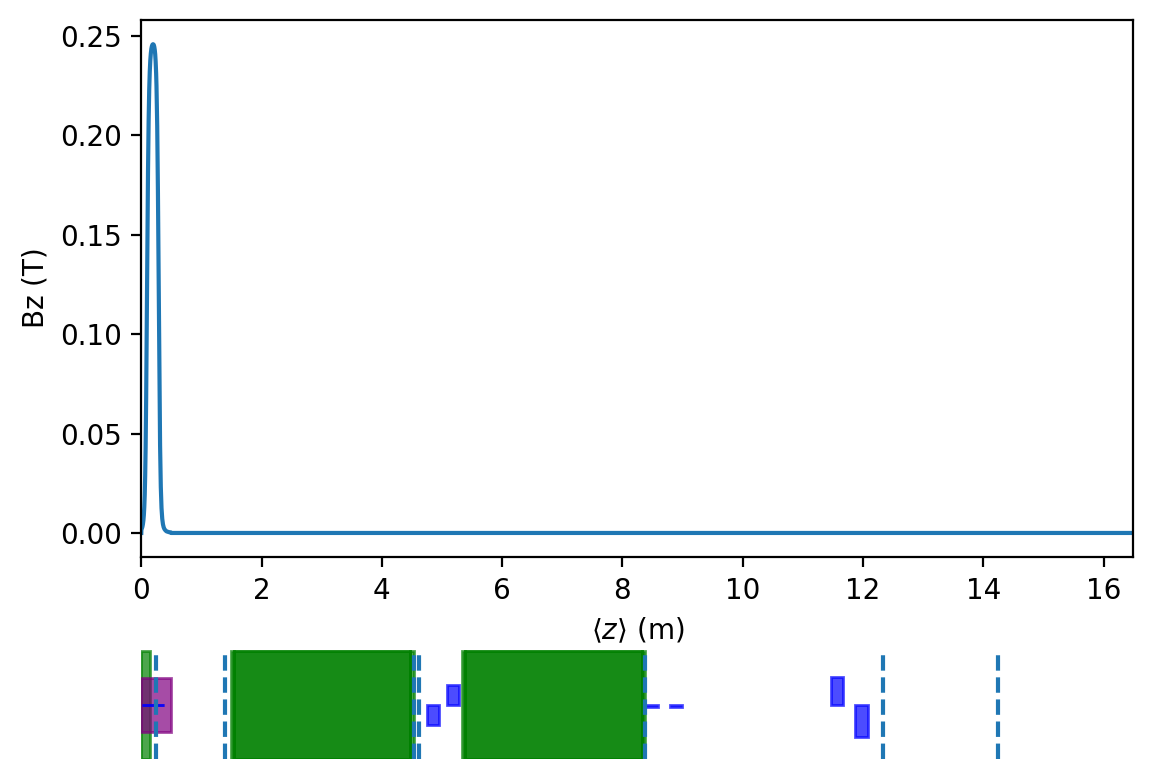

In [12]:
I.plot('Bz')

In [ ]:
from impact.plot import add_fieldmaps_to_axes

In [ ]:
fig, ax = plt.subplots()        
add_fieldmaps_to_axes(I, t=1, ax=ax, bounds=(0, 10))        

In [ ]:

fmaps = {}
for name in I.fieldmaps:
    data = I.fieldmaps[name]['data']
    fmaps[name] = process_fieldmap_solrf(data)

In [ ]:

            
ele_field(I.ele['GUN'], z=.1, fmaps=fmaps)

lattice_field(I.lattice, z=.3, fmaps=fmaps)

In [ ]:
I.track1()
I.plot('mean_kinetic_energy')

In [ ]:
I.input['fieldmaps']

In [ ]:
zz = I.stat('mean_z')
tt = I.stat('t')

In [ ]:
T = 1 / 2856000000.0

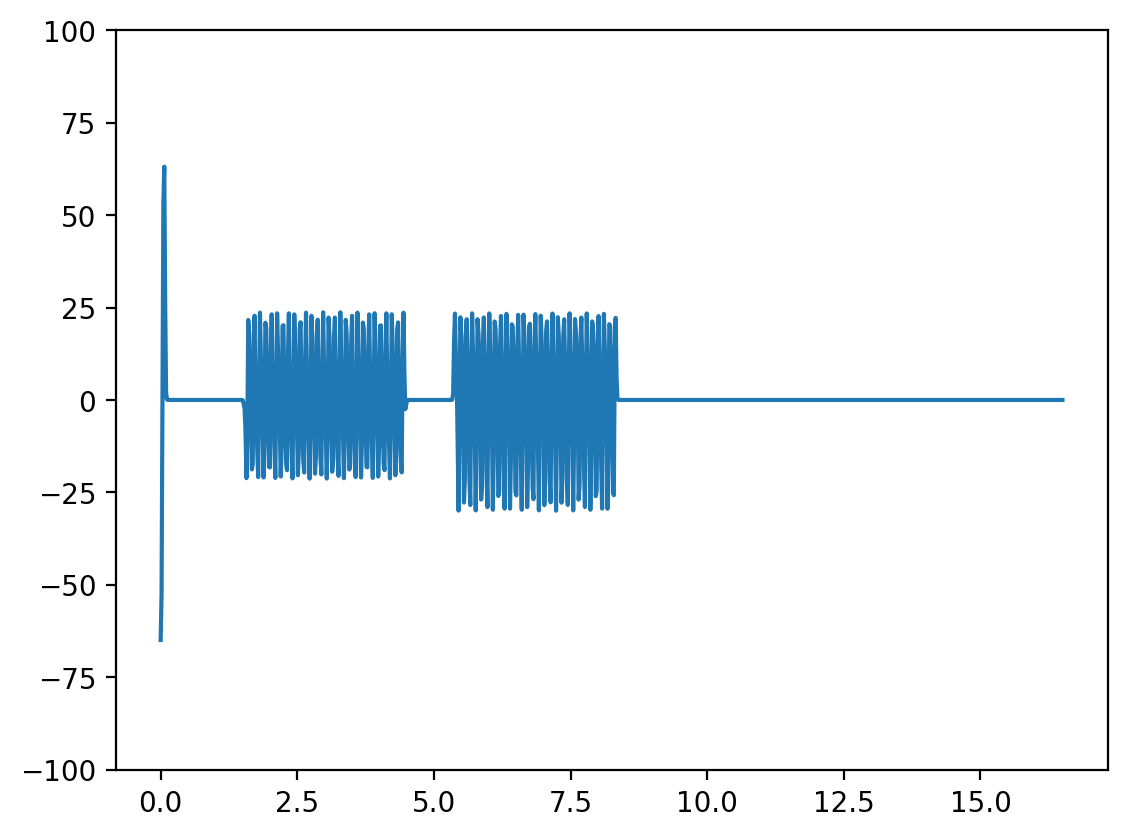

In [15]:
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

zz = np.linspace(0, I.stop, 1000)
def field_at(phi0):
    Ez_at = np.array([I.field(z=z, t=phi0/2856000000.0, 
                                 component='Ez') for z in zz])
    plt.plot(zz, Ez_at/1e6)
    plt.ylim(-100, 100)
    #plt.xlim(2, 2.2)

field_at(0)

In [16]:
from ipywidgets import interact
interact(field_at, phi0=(0, 2, .01))


interactive(children=(FloatSlider(value=1.0, description='phi0', max=2.0, step=0.01), Output()), _dom_classes=…

<function __main__.field_at(phi0)>

In [ ]:
Ez_seen = np.array([lattice_field(I.lattice, z=z, t=t, fmaps=fmaps,
                                 component='Ez') for z, t in zip(zz, tt)])
plt.plot(zz, Ez_seen)

In [ ]:
np.trapz(Ez_seen, zz) / 1e6

In [ ]:
@np.vectorize
def ff(z):
    return ele_field(I.ele['GUN'], z=z, fmaps=fmaps, t=1e-12)
def gg(t):
    return ele_field(I.ele['GUN'], z=0, fmaps=fmaps, t=t)

@np.vectorize
def hh(z):
    return lattice_field(I.lattice, z=z, fmaps=fmaps)

zlist = np.linspace(0, 10, 100)
tlist = np.linspace(0, 1/2856000000.0, 100)


plt.plot(zlist, hh(zlist))

In [ ]:
I.lattice

In [ ]:
fieldmap_reconsruction(fmap['rfdata7']['Ez'], 0)

In [ ]:
fmap = fieldmaps.process_fieldmap_solrf(rdfata['data'])

## Bokeh plotting from the input file

In [ ]:
infile = 'templates/lcls_injector/ImpactT.in'
os.path.exists(infile)

dat= parse_impact_input(infile)   
header = dat['header']
lattice = dat['lattice']

In [ ]:
layout = layout_plot(lattice)
show(layout)

# Output Plotting

In [ ]:
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Range1d
from impact.parsers import load_many_fort
from impact.parsers import UNITS



In [ ]:
opath = 'templates/lcls_injector/output/'
data = load_many_fort(opath, verbose=True)
ds = ColumnDataSource(data)

In [ ]:
def plot1(y_axis, x_axis='mean_z', source=ds):
    yunit = UNITS[y_axis]
    ylabel = y_axis+' ('+yunit+')'
    
    xunit = UNITS[x_axis]
    xlabel = x_axis+' ('+xunit+')'
    p = figure(plot_width=600, plot_height=200, x_axis_label=xlabel, y_axis_label=ylabel)
    p.line( x_axis, y_axis, source=source, color='red')
    return p
show(plot1('norm_emit_x'))

# Stacking plots

This also links the panning, zooming

In [ ]:
p1 = plot1('sigma_x')
p2 = plot1('norm_emit_x')
zmax = 2
layout.x_range = Range1d(0,zmax)
p1.x_range = Range1d(0,zmax)

layout.plot_width = p1.plot_width

# Link panning, zooming
layout.x_range = p1.x_range
p2.x_range = p1.x_range

show(
    column(
    p1,
    p2,
    layout))